In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_nametag = 'bigdata'

In [3]:
def RMSE(actual, predict):
    return round(np.sqrt(np.square(np.subtract(actual, predict)).mean()), 3)

time_array = pd.read_csv("clean_" + data_nametag + ".csv", index_col=0)["Time(s)"].to_numpy()
clean = pd.read_csv("clean_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
noisy = pd.read_csv("noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
outliers = pd.read_csv("outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()

lowess_noisy = pd.read_csv("lowess_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
lowess_outliers = pd.read_csv("lowess_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
poly_noisy = pd.read_csv("poly_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
poly_outliers = pd.read_csv("poly_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
spl_noisy = pd.read_csv("spl_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
spl_outliers = pd.read_csv("spl_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
wavelet_noisy = pd.read_csv("wavelet_noisy_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()
wavelet_outliers = pd.read_csv("wavelet_outliers_" + data_nametag + ".csv", index_col=0)["Pressure(psi)"].to_numpy()

rmse_lowess_noisy = RMSE(clean, lowess_noisy)
rmse_lowess_outliers = RMSE(clean, lowess_outliers)
rmse_poly_noisy = RMSE(clean, poly_noisy)
rmse_poly_outliers = RMSE(clean, poly_outliers)
rmse_spl_noisy = RMSE(clean, spl_noisy)
rmse_spl_outliers = RMSE(clean, spl_outliers)
rmse_wavelet_noisy = RMSE(clean, wavelet_noisy)
rmse_wavelet_outliers = RMSE(clean, wavelet_outliers)

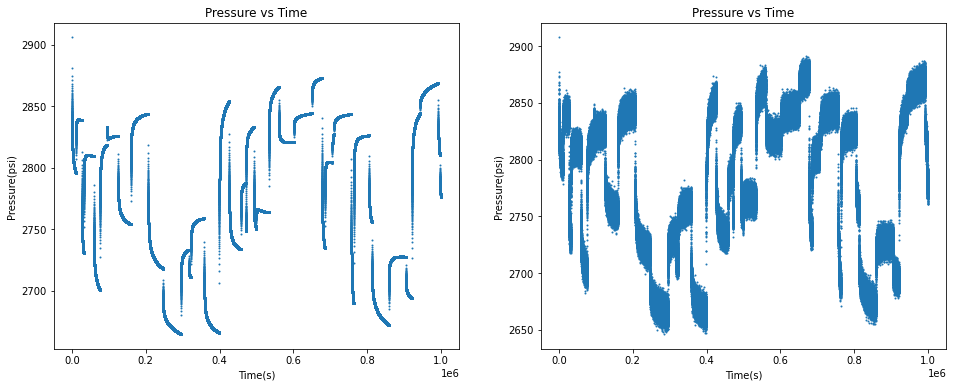

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.set_title("Pressure vs Time")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Pressure(psi)")
ax2.set_title("Pressure vs Time")
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Pressure(psi)")
ax1.scatter(time_array, clean, s=1)
ax2.scatter(time_array, noisy, s=1)
fig.savefig("clean_and_noisy_" + data_nametag, dpi=400, bbox_inches="tight")

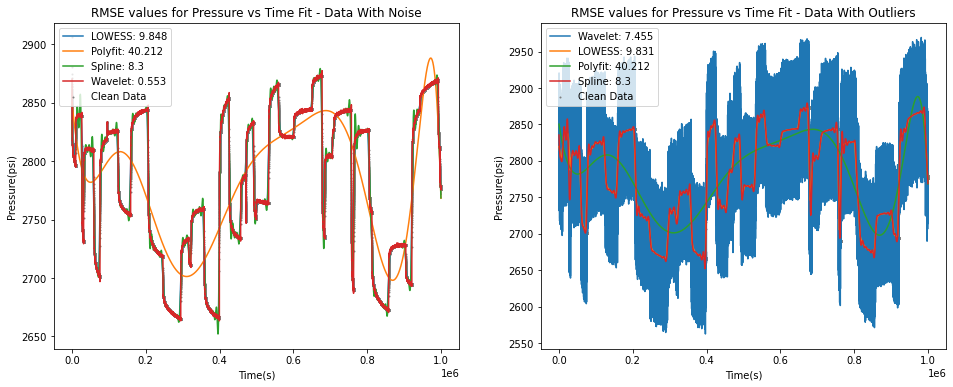

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.set_title("RMSE values for Pressure vs Time Fit - Data With Noise")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Pressure(psi)")
ax2.set_title("RMSE values for Pressure vs Time Fit - Data With Outliers")
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Pressure(psi)")
ax1.scatter(time_array, clean, s=1, color='grey', label='Clean Data')
ax1.plot(time_array, lowess_noisy, label="LOWESS: " + str(rmse_lowess_noisy))
ax1.plot(time_array, poly_noisy, label="Polyfit: " + str(rmse_poly_noisy))
ax1.plot(time_array, spl_noisy, label="Spline: " + str(rmse_spl_noisy))
ax1.plot(time_array, wavelet_noisy, label="Wavelet: " + str(rmse_wavelet_noisy))
ax2.scatter(time_array, clean, s=1,color='grey', label='Clean Data')
ax2.plot(time_array, wavelet_outliers, label="Wavelet: " + str(rmse_wavelet_outliers))
ax2.plot(time_array, lowess_outliers, label="LOWESS: " + str(rmse_lowess_outliers))
ax2.plot(time_array, poly_outliers, label="Polyfit: " + str(rmse_poly_outliers))
ax2.plot(time_array, spl_outliers, label="Spline: " + str(rmse_spl_outliers))
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
fig.savefig("rmse_values_" + data_nametag, dpi=400, bbox_inches="tight")

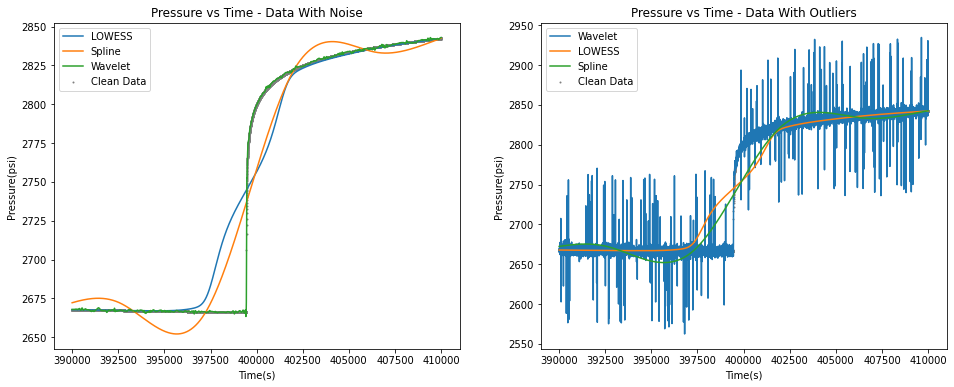

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.set_title("Pressure vs Time - Data With Noise")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Pressure(psi)")
ax2.set_title("Pressure vs Time - Data With Outliers")
ax2.set_xlabel("Time(s)")
ax2.set_ylabel("Pressure(psi)")
ax1.scatter(time_array[390000:410000], clean[390000:410000], color='grey', label='Clean Data', s=1)
ax1.plot(time_array[390000:410000], lowess_noisy[390000:410000], label='LOWESS')
ax1.plot(time_array[390000:410000], spl_noisy[390000:410000], label='Spline')
ax2.scatter(time_array[390000:410000], clean[390000:410000], color='grey', label='Clean Data', s=1)
ax1.plot(time_array[390000:410000], wavelet_noisy[390000:410000], label='Wavelet')
ax2.plot(time_array[390000:410000], wavelet_outliers[390000:410000], label='Wavelet')
ax2.plot(time_array[390000:410000], lowess_outliers[390000:410000], label='LOWESS')
ax2.plot(time_array[390000:410000], spl_outliers[390000:410000], label='Spline')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
fig.savefig("discussion1", dpi=400, bbox_inches="tight")